# Лабораторна робота №3
## виконав 
## Жорник Данило 
## студент групи КН-223с


# Завдання 1
Загрузити файл з даними про споживання енергії “En_In.xls”.  
Необхідно НЕ ВКЛЮЧАТИ інформацію з нижніх та верхніх рядків файлу даних.   
Перші два стовпці непотрібні, тому їх необхідно виключити із датафрейму, а також поміняти мітки стовпців так, щоб вони були такими:  
['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]

In [26]:
import pandas as pd
import numpy as np
from IPython.display import display

energy = pd.read_excel('En_In.xls', skiprows=17, skipfooter=38)
energy = energy.iloc[:, 2:]  # Exclude the first two columns
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
display(energy.head())

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650


# Завдання 2
Переведіть дані із стовпчику ‘Energy Supply’ в гДж (Примітка: в 1ПДж = 1000000 ГДж).  
Для всіх країн, у яких відсутні дані (наприклад, дані з "....."), переконайтеся, що це відображається як значення np.NaN.


In [10]:
energy['Energy Supply'] = pd.to_numeric(energy['Energy Supply'], errors='coerce')
energy['Energy Supply'] = energy['Energy Supply'] * 1e6
energy.replace('.....', np.nan, inplace=True)
display(energy.head())


,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10,78.669280
1,Albania,1.020000e+08,35,100.000000
2,Algeria,1.959000e+09,51,0.551010
3,American Samoa,NaN,...,0.641026
4,Andorra,9.000000e+06,121,88.695650


# Завдання 3
Перейменуйте наступний список країн: 
- "Republic of Korea" → "South Korea"
- "United States of America" → "United States"
- "United Kingdom of Great Britain and Northern Ireland" → "United Kingdom"
- "China, Hong Kong Special Administrative Region" → "Hong Kong"


In [11]:
country_replacements = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}

energy['Country'] = energy['Country'].replace(country_replacements)
display(energy.head())


,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10,78.669280
1,Albania,1.020000e+08,35,100.000000
2,Algeria,1.959000e+09,51,0.551010
3,American Samoa,NaN,...,0.641026
4,Andorra,9.000000e+06,121,88.695650


# Завдання 4
Видаліть цифри і дужки у назвах країн наприклад 'Bolivia (Plurinational State of)' перетворюється 'Bolivia', ‘Switzerland17’ повинна бути Switzerland’


In [12]:
energy['Country'] = energy['Country'].str.replace(r'\d+', '', regex=True)
energy['Country'] = energy['Country'].str.replace(r'\s*\(.*\)', '', regex=True)
display(energy.head())


,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10,78.669280
1,Albania,1.020000e+08,35,100.000000
2,Algeria,1.959000e+09,51,0.551010
3,American Samoa,NaN,...,0.641026
4,Andorra,9.000000e+06,121,88.695650


# Завдання 5
Завантажте дані про ВВП з файлу „gpd.csv”, що містить дані Світового банку про ВВП країн від 1960 до 2015 року.  
Обов’язково не включайте заголовок до датафрейму і перейменуйте наступний список країн:
- "Korea, Rep." → "South Korea"
- "Iran, Islamic Rep." → "Iran"
- "Hong Kong SAR, China" → "Hong Kong"


In [13]:
gdp = pd.read_csv('gpd.csv', skiprows=4)
gdp = gdp.loc[:, 'Country Name':'2015']
gdp.columns = ['Country', 'Country Code', 'Indicator Name', 'Indicator Code'] + [str(year) for year in range(1960, 2016)]

country_replacements_gdp = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
gdp['Country'] = gdp['Country'].replace(country_replacements_gdp)
display(gdp.head())


,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.022871e+09,1.070430e+09,1.157667e+09,1.247831e+09,1.317944e+09,1.325090e+09,1.368868e+09,1.407725e+09,1.428320e+09,1.428913e+09,1.460474e+09,1.458539e+09,1.476720e+09,1.502859e+09,1.529681e+09,1.565191e+09,1.616112e+09,1.705759e+09,1.792656e+09,1.879188e+09,1.950248e+09,1.999901e+09,2.018485e+09,1.997664e+09,2.045272e+09,2.101671e+09,2.199393e+09,2.398827e+09,2.475464e+09,2.576935e+09,2.606977e+09,2.765137e+09,2.942848e+09,3.296693e+09,3.562720e+09,3.842027e+09,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.013233e+09,8.689884e+09,8.781610e+09,9.762979e+09,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.730822e+10,2.807285e+10,3.029060e+10,3.198688e+10,3.211482e+10,3.201848e+10,3.163426e+10,2.945149e+10,2.217698e+10,2.295317e+10,2.534030e+10,2.817841e+10,3.040451e+10,3.247346e+10,3.352554e+10,3.453535e+10,3.599308e+10,3.349499e+10,3.525264e+10,3.908798e+10,4.622601e+10,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.442066e+09,5.754748e+09,5.924432e+09,5.989893e+09,5.914924e+09,6.020248e+09,6.359624e+09,6.309520e+09,6.219922e+09,6.831748e+09,6.177564e+09,4.349685e+09,4.036508e+09,4.424012e+09,4.791205e+09,5.428436e+09,5.922423e+09,5.280560e+09,5.756278e+09,6.533443e+09,6.969002e+09,7.522364e+09,7.840663e+09,8.293343e+09,8.766856e+09,9.268393e+09,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


# Завдання 6
Завантажте дані з файлу „scimagojr.xlsx”, який класифікує країни на основі їхніх публікацій в журналах у галузі енергетичного машинобудування та енергетичних технологій.


In [14]:
scimago = pd.read_excel('scimagojr.xlsx')
display(scimago.head())

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57


# Завдання 7
Приєднайте три набори даних із завдань 1-6 до нового набору даних (використовуючи перетин назв країн).
 - Використовуйте лише дані про ВВП за останні 10 років (2006-2015 рр.) і 
лише 15 найкращих країн за рейтингом Scimagojr (Rank від 1 до 15)
 - Індексом цього DataFrame повинна бути назва країни, а стовпцями мають 
бути ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% 
Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', 
'2015'].


In [25]:
scimago_top15 = scimago[scimago['Rank'] <= 15]
energy_scimago_merged = pd.merge(scimago_top15, energy, how='left', on='Country')

final_merge = pd.merge(energy_scimago_merged, gdp, how='left', on='Country')

final_columns = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
                 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', 
                 '% Renewable'] + [str(year) for year in range(2006, 2016)]

result = final_merge.set_index('Country')[final_columns]
display(result)
print(result.shape)


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,NaN,NaN,NaN,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,NaN,NaN,NaN,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


(15, 20)


# Завдання 8
Створіть функцію, щоб визначити середній ВВП країн за останні 10 років


In [16]:
def average_gdp(df):
    gdp_columns = [str(year) for year in range(2006, 2016)]
    avg_gdp = df[gdp_columns].mean(axis=1).sort_values(ascending=False)
    return avg_gdp

average_gdp_result = average_gdp(result)
print(average_gdp_result)


Country
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64


# Завдання 9
Створіть функцію, щоб визначити, наскільки змінився ВВП за останні 10 років для країни з 5-м середнім ВВП.  
Ця функція повинна повертати кортеж із назвою країни та значенням, на яке змінився ВВП


In [17]:
def gdp_change_for_5th(df):
    # Get the average GDP for the countries, sorted in descending order
    avg_gdp = df[[str(year) for year in range(2006, 2016)]].mean(axis=1)
    avg_gdp_sorted = avg_gdp.sort_values(ascending=False)

    # 5th country in terms of average GDP
    fifth_country = avg_gdp_sorted.index[4]

    # GDP values for 2006 and 2015 for this country
    gdp_2006 = df.loc[fifth_country, '2006']
    gdp_2015 = df.loc[fifth_country, '2015']

    # The change in GDP (2015 GDP - 2006 GDP)
    gdp_change = gdp_2015 - gdp_2006

    return (fifth_country, gdp_change)

gdp_change_result = gdp_change_for_5th(result)
print(gdp_change_result)


('Brazil', np.float64(474343725980.5698))


# Завдання 10
Створіть функцію, щоб визначити, в якій країні встановлено максимум поновлюваних джерел енергії (% Renewable) та який саме відсоток.  
Ця функція повинна повертати кортеж із назвою країни та відсотком.

In [18]:
def max_renewable_energy(df):
    # Find the country with the maximum % Renewable
    max_renewable_country = df['% Renewable'].idxmax()

    # Get the maximum % Renewable value
    max_renewable_value = df['% Renewable'].max()

    return (max_renewable_country, max_renewable_value)

max_renewable_result = max_renewable_energy(result)
print(max_renewable_result)


('Brazil', np.float64(69.64803))


# Завдання 11
Створіть стовпець, в якому оцінюється чисельність населення. Для пошуку оцінки використовуйте значення енергопостачання (Energy Supply) та енергопостачання на душу населення (Energy Supply per capita). Яка країна є шостою за цією оцінкою?  
Ця функція повинна повертати кортеж із назвою країни та населенням

In [19]:
def sixth_highest_population(df):
    # Estimate population
    df['Population'] = df['Energy Supply'] / df['Energy Supply per Capita']

    # Sort by Population and get the 6th country
    sixth_country = df.sort_values(by='Population', ascending=False).iloc[5]

    return sixth_country.name, sixth_country['Population']

sixth_highest_result = sixth_highest_population(result)
print(sixth_highest_result)


('Germany', 80369696.96969697)


# Завдання 12
Створіть стовпець, в якому оцінюється кількість цитованих документів на одну особу. Який взаємозв'язок між кількістю цитованих документів на душу населення та енергозабезпеченням на душу населення? Використовуйте метод .corr () (кореляція Пірсона).  
Ця функція повинна повертати одне число

In [20]:
def cited_docs_energy_corr(df):
    # Estimate the cited documents per person
    df['Cited Docs per Capita'] = df['Citations'] / df['Population']

    # Find the Pearson correlation between Cited Docs per Capita and Energy Supply per Capita
    correlation = df['Cited Docs per Capita'].corr(df['Energy Supply per Capita'])

    return correlation

correlation_result = cited_docs_energy_corr(result)
print(correlation_result)


0.7485600772321211


# Завдання 13
Створіть новий стовпчик в який занесіть 1, якщо значення % відновлюваної енергії (% Renewable) країни дорівнює або вище медіани для всіх країн, і 0, якщо значення (% Renewable) нижче медіани.  
Ця функція повинна повертати Series, індексом якого є назва країни, відсортована у порядку зростання Rank

In [21]:
def renewable_above_median(df):
    # Calculate the median of the % Renewable column
    renewable_median = df['% Renewable'].median()

    # Create a column to check if % Renewable is >= median
    df['Renewable Above Median'] = (df['% Renewable'] >= renewable_median).astype(int)

    # Sort by Rank
    df_sorted = df.sort_values(by='Rank')

    return df_sorted['Renewable Above Median']

renewable_median_result = renewable_above_median(result)
print(renewable_median_result)


Country
China                 1
Japan                 0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                0
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Renewable Above Median, dtype: int64


# Завдання 14
Використайте словник, щоб згрупувати країни за континентами, потім створіть DataFrame, який відображає розмір вибірки (кількість країн на кожному континенті), а також суму, середнє та стандартне відхилення для оцінки кількості населення для кожної країни.  

In [22]:
ContinentDict = {
    'China': 'Asia', 'United States': 'North America', 'Japan': 'Asia', 'United Kingdom': 'Europe',
    'Russian Federation': 'Europe', 'Canada': 'North America', 'Germany': 'Europe', 'India': 'Asia',
    'France': 'Europe', 'South Korea': 'Asia', 'Italy': 'Europe', 'Spain': 'Europe', 'Iran': 'Asia',
    'Australia': 'Australia', 'Brazil': 'South America'
}

def continent_population_stats(df, continent_dict):
    # Create a 'Continent' column using the mapping from ContinentDict
    df['Continent'] = df.index.to_series().map(continent_dict)

    # Group by 'Continent' and calculate population statistics
    population_stats = df.groupby('Continent')['Population'].agg(
        sample_size='count',
        population_sum='sum',
        population_mean='mean',
        population_std='std'
    )

    return population_stats

population_stats_result = continent_population_stats(result, ContinentDict)
print(population_stats_result)


               sample_size    population_sum   population_mean  population_std
Continent                                                                     
Asia                     5   2898666386.6106   579733277.32212    6.790979e+08
Australia                1   23316017.316017   23316017.316017             NaN
Europe                   5  394058699.474436   78811739.894887    3.813228e+07
North America            1   35239864.864865   35239864.864865             NaN
South America            1  205915254.237288  205915254.237288             NaN


# Завдання 15
Створіть бульбашкову діаграму, що відображає залежність % поновлюваних джерел від рейтингу країни (% Renewable vs. Rank).Розмір бульбашки відповідає ВВП країн 2015 року, а колір відповідає континенту

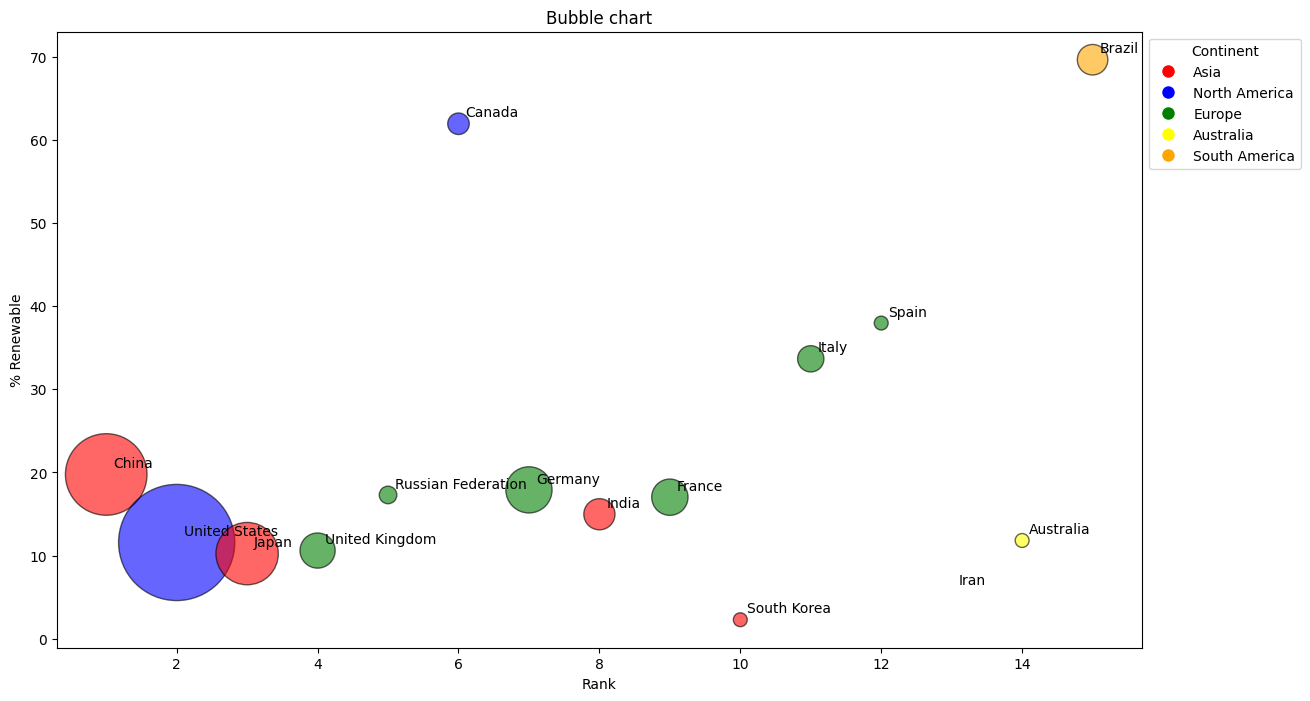

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

def load_energy_data(file_path):
    """Load and preprocess the energy data."""
    energy = pd.read_excel(file_path, skiprows=17, skipfooter=38)
    energy = energy.iloc[:, 2:]  # Drop the first two columns
    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    
    # Convert Energy Supply from PJ to GJ
    energy['Energy Supply'] = pd.to_numeric(energy['Energy Supply'], errors='coerce') * 1e6
    
    # Replace placeholder with NaN
    energy.replace('.....', np.nan, inplace=True)

    # Clean country names
    country_replacements_energy = {
        "Republic of Korea": "South Korea",
        "United States of America": "United States",
        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
        "China, Hong Kong Special Administrative Region": "Hong Kong"
    }
    energy['Country'] = energy['Country'].replace(country_replacements_energy, regex=True)
    energy['Country'] = energy['Country'].str.replace(r'\d+', '', regex=True).str.replace(r'\s*\(.*\)', '', regex=True)
    
    return energy

def load_gpd_data(file_path):
    """Load and preprocess the GPD data."""
    gpd = pd.read_csv(file_path, skiprows=4)
    gpd = gpd.loc[:, ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + [str(year) for year in range(2006, 2016)]]
    gpd.columns = ['Country', 'Country Code', 'Indicator Name', 'Indicator Code'] + [str(year) for year in range(2006, 2016)]
    
    # Rename countries in GPD dataset
    country_replacements_gpd = {
        "Korea, Rep.": "South Korea",
        "Iran, Islamic Rep.": "Iran",
        "Hong Kong SAR, China": "Hong Kong"
    }
    gpd['Country'] = gpd['Country'].replace(country_replacements_gpd)
    
    return gpd

def load_scimago_data(file_path):
    """Load and filter the Scimago data."""
    scimago = pd.read_excel(file_path)
    return scimago[scimago['Rank'] <= 15]  # Filter for top 15 countries

def merge_data(energy, gpd, scimago):
    """Merge energy, GPD, and Scimago data."""
    energy_scimago_merged = pd.merge(scimago, energy, how='inner', on='Country')
    final_merge = pd.merge(energy_scimago_merged, gpd, how='inner', on='Country')
    
    # Set index and select final columns
    final_columns = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
                     'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', 
                     '% Renewable'] + [str(year) for year in range(2006, 2016)]
    
    return final_merge.set_index('Country')[final_columns]

def plot_bubble_chart(result):
    """Plot a bubble chart of the results."""
    continent_dict = {
        'China': 'Asia', 'United States': 'North America', 'Japan': 'Asia', 'United Kingdom': 'Europe',
        'Russian Federation': 'Europe', 'Canada': 'North America', 'Germany': 'Europe', 'India': 'Asia',
        'France': 'Europe', 'South Korea': 'Asia', 'Italy': 'Europe', 'Spain': 'Europe', 'Iran': 'Asia',
        'Australia': 'Australia', 'Brazil': 'South America'
    }
    
    # Create a new figure and axis
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Create a color map for continents
    continent_colors = {
        'Asia': 'red', 'North America': 'blue', 'Europe': 'green', 
        'Australia': 'yellow', 'South America': 'orange'
    }
    
    # Get the GPD values for 2015
    gpd_2015 = result['2015']
    
    # Normalize GPD values for bubble sizes, ensuring a minimum size
    size_scale = 7000
    min_size = 100
    sizes = ((gpd_2015 - gpd_2015.min()) / (gpd_2015.max() - gpd_2015.min()) * size_scale).clip(lower=min_size)
    
    # Create a color array based on continents
    colors = [continent_colors.get(continent_dict.get(country, 'Unknown'), 'gray') for country in result.index]
    
    # Create the scatter plot
    scatter = ax.scatter(result['Rank'], result['% Renewable'], s=sizes, c=colors, alpha=0.6, edgecolors='black')
    
    # Annotate each point with the country name
    for idx, country in enumerate(result.index):
        ax.annotate(country, (result['Rank'].iloc[idx], result['% Renewable'].iloc[idx]),
                    xytext=(5, 5), textcoords='offset points')
    
    # Set labels and title
    ax.set_xlabel('Rank')
    ax.set_ylabel('% Renewable')
    ax.set_title('Bubble chart')
    
    # Add a legend for continents
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=continent,
                                    markerfacecolor=color, markersize=10) for continent, color in continent_colors.items()]
    ax.legend(handles=legend_elements, title='Continent', loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.show()

# Main execution
energy = load_energy_data('En_In.xls')
gpd = load_gpd_data('gpd.csv')
scimago = load_scimago_data('scimagojr.xlsx')
result = merge_data(energy, gpd, scimago)
plot_bubble_chart(result)
